# Autoencoder

Les autoencoders permettent d'extraire les caracteristiques importantes de donnees, le principe est tres simple, on demande a un multilayer perceptron de reconstituer l'entree, en utilisant un encodeur puis un decodeur.

Le reseau autoencoder se retrouve sous la forme suivante:

![autoencoder](http://nghiaho.com/wp-content/uploads/2012/12/autoencoder_network1.png)

Vous noterez qu'il y a de moins en moins de neurones au centre et qu'il y a le meme nombre d'entree et de sortie.

In [8]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [18]:
# Parametres
vitesse_apprentissage = 0.001
batch_size = 256
examples_to_show = 20

# Parametres du reseau
n_hidden_1 = 512 # Neurones de la premiere couche
n_hidden_2 = 256 # Neurones de la secondes couche
n_input = 28*28

X = tf.placeholder("float", [None, n_input])

In [19]:
def generate_weights(x, y):
    return tf.Variable(tf.truncated_normal([x, y], stddev=1./x))

def generate_bias(x):
    return tf.Variable(tf.truncated_normal([x], stddev=1./x))

In [20]:
encoder_W1 = generate_weights(n_input, n_hidden_1)
encoder_W2 = generate_weights(n_hidden_1, n_hidden_2)
decoder_W1 = generate_weights(n_hidden_2, n_hidden_1)
decoder_W2 = generate_weights(n_hidden_1, n_input)

encoder_b1 = generate_bias(n_hidden_1)
encoder_b2 = generate_bias(n_hidden_2)
decoder_b1 = generate_bias(n_hidden_1)
decoder_b2 = generate_bias(n_input)


Comme il s'agit d'un multilayer perceptron que nous avons deja vu, je ne commente pas cette section, vous voyez seulement l'initialisation des poids et bias de chaque couche.

In [21]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.matmul(x, encoder_W1) + encoder_b1)
    layer_2 = tf.nn.sigmoid(tf.matmul(layer_1, encoder_W2) + encoder_b2)
    return layer_2

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.matmul(x, decoder_W1) + decoder_b1)
    layer_2 = tf.nn.sigmoid(tf.matmul(layer_1, decoder_W2) + decoder_b2)
    return layer_2

On introduit ici une nouvelle fonction **sigmoid**, nous avons vu par le passe **softmax** et **relu**, la fonction sigmoide a la forme suivante:

![sigmoid](http://www.ai-junkie.com/ann/evolved/images/sigmoid.jpg)

In [22]:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

y_pred = decoder_op

cout = tf.reduce_mean(tf.pow(X - y_pred, 2))
optimizer = tf.train.AdamOptimizer(vitesse_apprentissage).minimize(cout)

Le code ci-dessus ne devrait pas vous surprendre, vous noterez que j'ai choisi un autre algorithme d'optimisation car il est plus rapide, l'ancien algorithme fonctionnerait egalement, vous pouvez d'ailleurs l'essayer et voir les differences de performances. La fonction de cout est differente egalement, on compare pixel par pixel et on eleve au carre pour se debarasser du signe.

In [23]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(20):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cout], feed_dict={X: batch_xs})
    
    print("Iteration:", '%04d' % (epoch+1),
              "cout =", "{:.9f}".format(c))

Iteration: 0001 cout = 0.067301281
Iteration: 0002 cout = 0.064673536
Iteration: 0003 cout = 0.063054115
Iteration: 0004 cout = 0.062323365
Iteration: 0005 cout = 0.054390118
Iteration: 0006 cout = 0.046464268
Iteration: 0007 cout = 0.036692441
Iteration: 0008 cout = 0.033177093
Iteration: 0009 cout = 0.026435079
Iteration: 0010 cout = 0.022288337
Iteration: 0011 cout = 0.018476611
Iteration: 0012 cout = 0.016855165
Iteration: 0013 cout = 0.016231678
Iteration: 0014 cout = 0.013957366
Iteration: 0015 cout = 0.013703167
Iteration: 0016 cout = 0.012085512
Iteration: 0017 cout = 0.010977541
Iteration: 0018 cout = 0.010464481
Iteration: 0019 cout = 0.010015040
Iteration: 0020 cout = 0.008656238


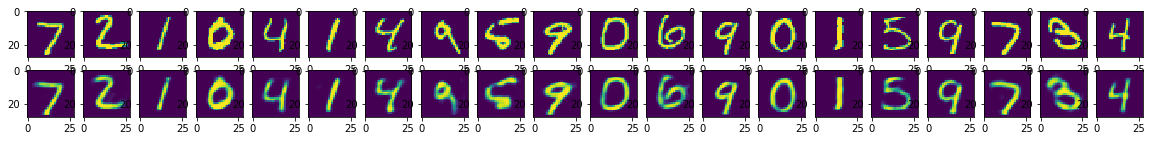

In [24]:
encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

# Comparaison entre l'entree et la sortie
f, a = plt.subplots(2, examples_to_show, figsize=(examples_to_show, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
plt.show()

**Exercice 1:** Connecter encoder_op a un reseau utilise precedement pour faire la detection de chiffre et voir le resultat.

**Exercice 2:** Ajouter une couche avec une dimension encore plus petite et regarder le resultat du decodage, que se passe t-il ?